In [1]:
!pip install transformers

In [2]:
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpus_available)

import pandas as pd
import numpy as np

Num GPUs Available:  1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
TrainPATH = '/content/drive/MyDrive/VeeSmart Internship/BERT - Binary/Data/trainData.csv'
TestPATH = '/content/drive/MyDrive/VeeSmart Internship/BERT - Binary/Data/testData.csv'

In [5]:
Train = pd.read_csv(TrainPATH)
Test = pd.read_csv(TestPATH)

Train.shape,Test.shape

((79996, 16), (20004, 16))

In [6]:
Train.head(2)

,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char,categories,clean_text,clean_text_length,labels
0,ZyZHtLOdr1gGyVMoJmwgDA,YKBeYSWYU4KYxh9u7TnV-A,5,0,0,0,I have been a patient at this practice for 10+...,2013,10,28,15,1287,"doctors, obstetricians & gynecologists, medica...",patient practic 10 year whatev reason patient ...,117,1
1,23wNTRDtDy0WhXrjTwwqew,AJ7POJg-otBUQvABCzaNlw,5,2,0,0,I have to say that I am not a bubble tea conno...,2016,1,18,18,741,"food, bubble tea, taiwanese, restaurants, coff...",say bubbl tea connoisseur howev bubbl tea ive ...,67,1


In [7]:
Test.head(2)

,user_id,business_id,stars,useful,funny,cool,text,year,month,day,hour,text_length_char,categories,clean_text,clean_text_length,labels
0,b_QvfO_V4Nc43L7N2YixAA,kwLzXTBNRhz9araScfT06g,5,0,0,0,I have been coming here a lot since I like the...,2012,1,6,4,259,"home decor, furniture stores, shopping, food, ...",come lot sinc like product especi sweet differ...,21,1
1,HD6rmobwydmwxuARUNh_-Q,Y2cj0TQvfSdRU3H55CkEgA,3,0,0,0,If you like petite burgers without a lot of sa...,2017,3,16,17,306,"bars, wine bars, nightlife, beer bar, hot dogs...",like petit burger without lot sauc place your ...,32,0


In [8]:
train=Train[["text", "labels"]]
test=Test[["text", "labels"]]

train.shape,test.shape

((79996, 2), (20004, 2))

In [9]:
from keras.preprocessing.text import text_to_word_sequence
def maxNumWords512(text):
    l=text_to_word_sequence(str(text))
    if len(l) >= 512:
        l = l[:511]
    return " ".join(l)

maxWordsNum = 0
def maxNumWords(text):
    global maxWordsNum
    l = text_to_word_sequence(str(text))
    if len(l) > maxWordsNum:
        maxWordsNum = len(l)

In [10]:
train.head(2)

,text,labels
0,I have been a patient at this practice for 10+...,1
1,I have to say that I am not a bubble tea conno...,1


In [11]:
test.head(2)

,text,labels
0,I have been coming here a lot since I like the...,1
1,If you like petite burgers without a lot of sa...,0


In [12]:
train.text.apply(maxNumWords)
print("Max num of words per sentence in the training set is: ",maxWordsNum)
maxWordsNum = 0

test.text.apply(maxNumWords)
print("Max num of words per sentence in the test set is: ",maxWordsNum)
maxWordsNum = 0

train.text=train.text.apply(maxNumWords512)
test.text=test.text.apply(maxNumWords512)

train.text.apply(maxNumWords)
print("Max num of words per sentence in the training set is: ",maxWordsNum)
maxWordsNum = 0

test.text.apply(maxNumWords)
print("Max num of words per sentence in the test set is: ",maxWordsNum)
maxWordsNum = 0

Max num of words per sentence in the training set is:  988
Max num of words per sentence in the test set is:  988


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Max num of words per sentence in the training set is:  511
Max num of words per sentence in the test set is:  511


In [13]:
train.head(2)

,text,labels
0,i have been a patient at this practice for 10 ...,1
1,i have to say that i am not a bubble tea conno...,1


In [14]:
test.head(2)

,text,labels
0,i have been coming here a lot since i like the...,1
1,if you like petite burgers without a lot of sa...,0


In [15]:
num_classes=len(train.labels.unique())
from sklearn.utils import class_weight
class_weight = dict(enumerate(class_weight.compute_class_weight(class_weight='balanced',classes=train["labels"].unique(),y=train["labels"])))
class_weight

{0: 0.7389111599637915, 1: 1.5464140730717186}

In [16]:
reviews = train.text.values.tolist()
labels = train.labels.tolist()

In [17]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=0.15)

In [18]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

tokenizer([training_sentences[0]], max_length=262, truncation=True, padding="max_length")

{'input_ids': [[101, 2327, 6758, 1998, 2200, 10849, 10036, 4355, 24547, 22345, 12824, 2005, 2026, 2482, 2001, 10550, 2027, 2165, 2729, 1997, 2033, 2005, 4724, 1998, 2009, 2001, 3565, 3435, 2469, 2009, 2001, 1037, 2109, 12824, 1999, 2307, 4650, 2021, 1045, 2123, 1005, 1056, 2342, 2178, 2753, 2199, 2661, 12731, 2480, 2026, 2482, 2180, 1005, 1056, 2197, 2008, 2146, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask'

In [19]:
train_encodings = tokenizer(training_sentences, max_length=262, truncation=True, padding="max_length")
val_encodings = tokenizer(validation_sentences, max_length=262, truncation=True, padding="max_length")
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), training_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), validation_labels))

In [20]:
ACCURACY_THRESHOLD = 0.90

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
        
callbacks = myCallback()

In [21]:
from transformers import TFDistilBertForSequenceClassification
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=num_classes)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [22]:
#import tensorflow_addons as tfa
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
#optimizer = tfa.optimizers.AdamW(weight_decay=1e-4, learning_rate=5e-5, epsilon=1e-08)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=metric)

model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  1538      
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_dataset.shuffle(100).batch(32),
          epochs=3,
          batch_size=32,
          validation_data=val_dataset.shuffle(100).batch(32),
          verbose=1, callbacks=[callbacks], class_weight=class_weight)

Epoch 1/3
2125/2125 [==============================] - 3567s 2s/step - loss: 0.2417 - accuracy: 0.8952 - val_loss: 0.2088 - val_accuracy: 0.9181
Epoch 2/3
2125/2125 [==============================] - 3556s 2s/step - loss: 0.1600 - accuracy: 0.9335 - val_loss: 0.2412 - val_accuracy: 0.9146

Reached 90.00% accuracy, so stopping training!!


In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


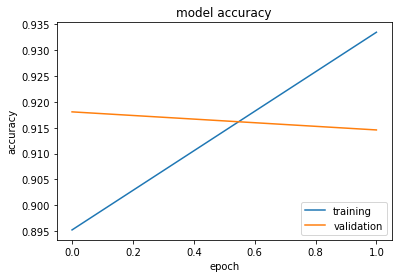

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

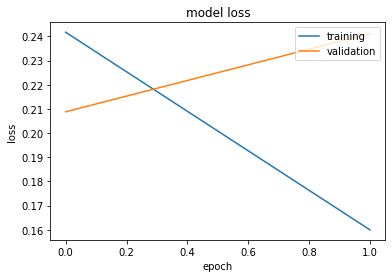

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [28]:
model.save_pretrained("/content/drive/MyDrive/VeeSmart Internship/BERT - Binary/Model/BERTmodel")
#loaded_model = TFDistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/VeeSmart Internship/BERT - Binary/Model/BERTmodel")

In [ ]:
"""#import tensorflow_addons as tfa
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
#optimizer = tfa.optimizers.AdamW(weight_decay=1e-4, learning_rate=5e-5, epsilon=1e-08)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

loaded_model.compile(optimizer=optimizer, loss=loss, metrics=metric)"""

In [41]:
test_sentence = "This is a great product. I really like it"
predict_input = tokenizer.encode(test_sentence, max_length=262, truncation=True, padding="max_length", return_tensors="tf")
tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

Positive


In [30]:
test_sentence = "This is a really bad product. I hate it"
predict_input = tokenizer.encode(test_sentence, max_length=262, truncation=True, padding="max_length", return_tensors="tf")
tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

Negative


In [31]:
test=test.head(1000)

In [32]:
test_encodings = tokenizer(list(test.text), max_length=262, truncation=True, padding="max_length")
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), list(test.labels)))

In [33]:
len(test_dataset)

1000

In [43]:
predictions = []
j=0
for i in test["text"]:
  j+=1
  predict_input = tokenizer.encode(i, max_length=262, truncation=True, padding="max_length", return_tensors="tf")
  tf_output = model.predict(predict_input)[0]
  tf_prediction = tf.nn.softmax(tf_output, axis=1)
  label = tf.argmax(tf_prediction, axis=1)
  label = label.numpy()
  predictions.append(label[0])
  if j%10==0:
    print(j)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


In [44]:
predictions

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,


In [45]:
from sklearn import metrics
test_labels = list(test.labels)
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(test_labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(test_labels, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(test_labels, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(test_labels, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.932000
Precision: 0.936950
Recall: 0.962349
F1 score: 0.949480


In [46]:
print('Clasification report:\n', metrics.classification_report(test_labels, predictions))

Clasification report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       336
           1       0.94      0.96      0.95       664

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



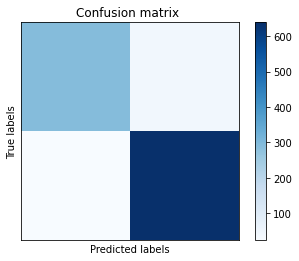

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, predictions)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve (test_labels, predictions)

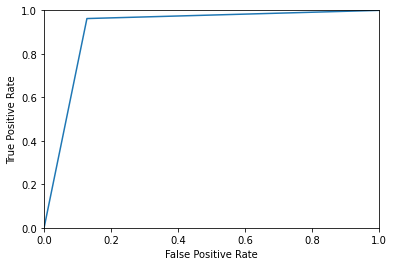

In [49]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 